# Image Augmentation

## Import modules

In [26]:
import cv2
import albumentations as A
import random
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Setting table

In [27]:
IMAGE_DATASET_DIRECTORY_PATH = "D:\DATA SCIENCE\CLOUD\DATASETS\cats_and_dogs\SANBOX_2"

RANDOM_SEED = 1

AUGMENTATION_RANDOM_CHECK_AMOUNT = 1
AUGMENTATION_REPLICA = 1

## Conditions check

In [28]:
# IMAGE_DATASET_DIRECTORY_PATH
assert (len(IMAGE_DATASET_DIRECTORY_PATH)), (f"IMAGE_DATASET_DIRECTORY_PATH must not be empty!")
assert (len(os.listdir(IMAGE_DATASET_DIRECTORY_PATH))), (f"IMAGE_DATASET_DIRECTORY_PATH must contain at least one image!")

# # AUGMENTATION_RANDOM_CHECK_AMOUNT
# assert (AUGMENTATION_RANDOM_CHECK_AMOUNT >= 0), (f"AUGMENTATION_RANDOM_CHECK_AMOUNT can be \n ZERO: Turn off random check feature. \n POSITIVE: generate random amount of images and their augmented replicas.")
# assert (AUGMENTATION_RANDOM_CHECK_AMOUNT <= len(os.listdir(IMAGE_DATASET_DIRECTORY_PATH))), ("AUGMENTATION_RANDOM_CHECK_AMOUNT must be smaller than population size!")

# # AUGMENTATION_REPLICA
# assert (AUGMENTATION_REPLICA > 0), (f"AUGMENTATION_REPLICA must be positive!")


## Load images

In [29]:
if AUGMENTATION_RANDOM_CHECK_AMOUNT:
    sample_images = []
    sample_list = random.sample(os.listdir(IMAGE_DATASET_DIRECTORY_PATH), AUGMENTATION_RANDOM_CHECK_AMOUNT)
    image = cv2.imread(os.path.join(IMAGE_DATASET_DIRECTORY_PATH, sample_list[0]))
    # OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red). Albumentations uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

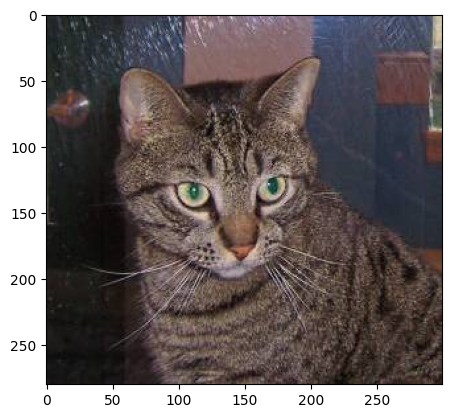

In [30]:
plt.imshow(image)

## Augmentation processing

In [31]:
transform = A.Compose([
    A.HorizontalFlip(p=0.3),
])

transformed_image_list = []

transformed_image = transform(image=image)["image"]
transformed_image_2 = transform(image=image)["image"]

## Visualization

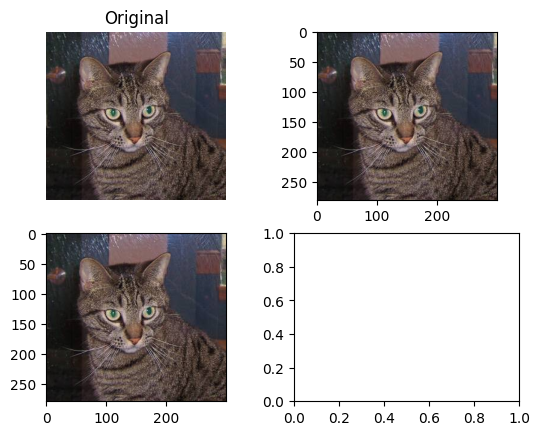

In [32]:
fig, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(image)
axarr[0, 0].axis("off")
axarr[0, 0].set_title("Original")
axarr[0, 1].imshow(transformed_image)
axarr[1, 0].imshow(transformed_image_2)